In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import plotly
from scipy import stats

In [4]:
def Box_Muller(u1,u2,n):
    #u1=np.random.random(n)
    #u2=np.random.random(n)
    r=np.sqrt(-2*np.log(u1))
    theta=2*np.pi*u2
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    return x,y
    

In [10]:
def Norm_Avg_Sd(u, avg, sd):
    value=u*sd+avg
    return value

In [11]:
norm_val=Norm_Avg_Sd(x, 10, 20)

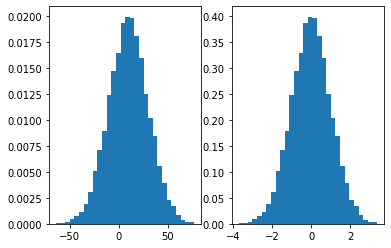

In [12]:
plt.subplot(121)
plt.hist(norm_val,30, density=True )
plt.subplot(122)
plt.hist(x,30, density=True )
plt.show()

In [8]:
n=10000
u1=np.random.random(n)
u2=np.random.random(n)
(x,y)=Box_Muller(u1, u2, n)

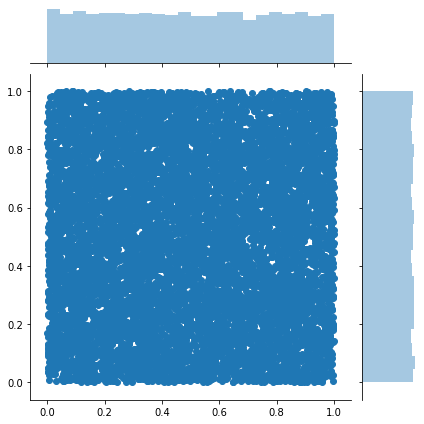

In [9]:
sns_plot=sns.jointplot(u1, u2, kind='scatter')
#sns_plot.savefig("Histogram_u1_u1.png")

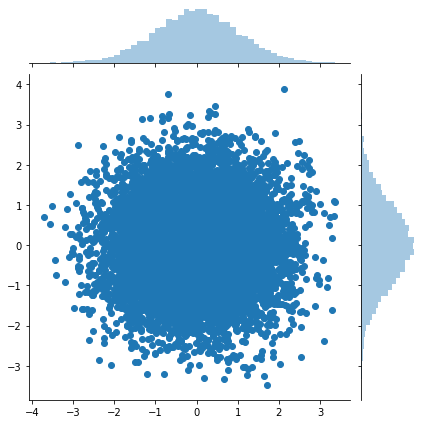

In [13]:
sns_plot=sns.jointplot(x, y, kind='scatter')
#sns_plot.savefig("Histogram_sna.png")

In [14]:
def test_norm_bm(u1, u2, n):
    from scipy import stats
    import pandas as pd
    (x,y)=Box_Muller(u1, u2, n)
    stat_x, p_x_dp=stats.normaltest(x)
    stat_y, p_y_dp=stats.normaltest(y)
    D_x, p_x_ks=stats.kstest(x, 'norm')
    D_y, p_y_ks=stats.kstest(y, 'norm')
    p_value={"p-value x":[p_x_dp, p_x_ks], "p-valye y":[p_y_dp, p_y_ks]}
    df=pd.DataFrame(data=p_value, index=["D'Agostino-Pearson", "Kolmogorov-Smirnov"])
    return df

In [15]:
test_norm_bm(u1, u2, n)

,p-value x,p-valye y
D'Agostino-Pearson,0.721417,0.860234
Kolmogorov-Smirnov,0.920707,0.735795


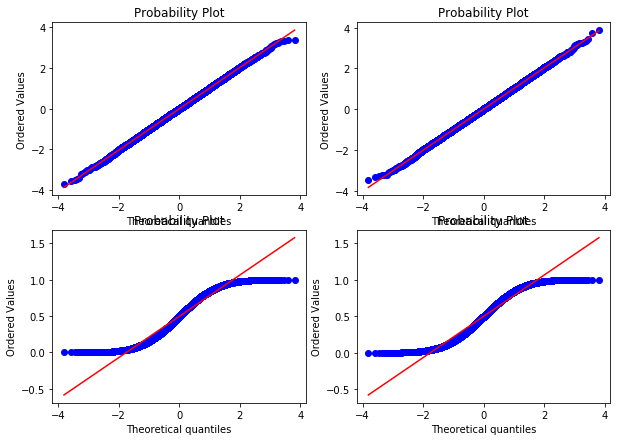

In [17]:
#Wykres kwantylowy
plt.figure(figsize=(10, 7))
plt.subplot(221)
stats.probplot(x, dist=stats.norm, plot=plt)
plt.subplot(222) 
stats.probplot(y, dist=stats.norm, plot=plt)
plt.subplot(223) 
stats.probplot(u1, dist=stats.norm, plot=plt)
plt.subplot(224) 
stats.probplot(u2, dist=stats.norm, plot=plt)
plt.savefig('wykresy_kwantylowe.png')
plt.show()

In [18]:
def centralne_twierdzenie_graniczne(u):
    import numpy as np
    n=len(u)
    m=[np.mean(np.random.choice(u, 30)) for _ in range(10000)]
    return m

In [18]:
z=centralne_twierdzenie_graniczne(u1)

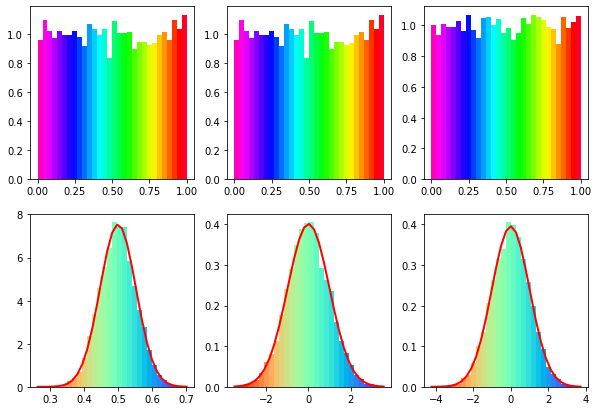

In [22]:
#Histogramy wraz z dopasowaniami ich rozkładów normalnych na podstawie ich średnich i odchyleń
plt.figure(figsize=(10, 7))

import matplotlib.cm as cm
cm = plt.cm.get_cmap('rainbow_r')
cm2 = plt.cm.get_cmap('gist_rainbow_r')

plt.subplot(231)
count, bins, ig1=plt.hist(u1, 30, density=True)

plt.subplot(232)
count, bins, ig2=plt.hist(u1, 30, density=True)

plt.subplot(233)
count, bins, ig3=plt.hist(u2, 30, density=True)

plt.subplot(234)
m_z, s_z = stats.norm.fit(z)
count_z, bins_z, ig_z = plt.hist(z, 30, density=True)
plt.plot(bins_z, 1/(s_z * np.sqrt(2 * np.pi)) * np.exp( - (bins_z - m_z)**2 / (2 * s_z**2) ), linewidth=2, color='r')

plt.subplot(235) 
m_x, s_x = stats.norm.fit(x)
count_x, bins_x, ig_x = plt.hist(x, 30, density=True)
plt.plot(bins_x, 1/(s_x * np.sqrt(2 * np.pi)) * np.exp( - (bins_x - m_x)**2 / (2 * s_x**2) ), linewidth=2, color='r')

plt.subplot(236)
m_y, s_y = stats.norm.fit(y)
count_y, bins_y, ig_y = plt.hist(y, 30, density=True)
plt.plot(bins_y, 1/(s_y * np.sqrt(2 * np.pi)) * np.exp( - (bins_y - m_y)**2 / (2 * s_y**2) ), linewidth=2, color='r')


bin_centers = 0.5 * (bins_z[:-1] + bins_z[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, ig_x):
    plt.setp(p, 'facecolor', cm(c))
    
for c, p in zip(col, ig_y):
    plt.setp(p, 'facecolor', cm(c))
    
for c, p in zip(col, ig_z):
    plt.setp(p, 'facecolor', cm(c))

for c, p in zip(col, ig1):
    plt.setp(p, 'facecolor', cm2(c))
    
for c, p in zip(col, ig2):
    plt.setp(p, 'facecolor', cm2(c))
    
for c, p in zip(col, ig3):
    plt.setp(p, 'facecolor', cm2(c))

plt.savefig('Rainbow_histograms.png')
plt.show()
